In [10]:
library("rpart")
library("forecast")


In [11]:
head(iris, 10)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [12]:
modelo <- rpart(Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + Species, data = iris)
modelo


n= 150 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 150 102.1683000 5.843333  
   2) Petal.Length< 4.25 73  13.1391800 5.179452  
     4) Petal.Length< 3.4 53   6.1083020 5.005660  
       8) Sepal.Width< 3.25 20   1.0855000 4.735000 *
       9) Sepal.Width>=3.25 33   2.6696970 5.169697 *
     5) Petal.Length>=3.4 20   1.1880000 5.640000 *
   3) Petal.Length>=4.25 77  26.3527300 6.472727  
     6) Petal.Length< 6.05 68  13.4923500 6.326471  
      12) Petal.Length< 5.15 43   8.2576740 6.165116  
        24) Sepal.Width< 3.05 33   5.2218180 6.054545 *
        25) Sepal.Width>=3.05 10   1.3010000 6.530000 *
      13) Petal.Length>=5.15 25   2.1896000 6.604000 *
     7) Petal.Length>=6.05 9   0.4155556 7.577778 *

In [13]:
summary(modelo)


Call:
rpart(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + 
    Species, data = iris)
  n= 150 

          CP nsplit rel error    xerror       xstd
1 0.61346237      0 1.0000000 1.0190751 0.10000392
2 0.12180701      1 0.3865376 0.4406884 0.05134878
3 0.05718872      2 0.2647306 0.3239390 0.03334145
4 0.02980452      3 0.2075419 0.2644448 0.03168911
5 0.02303165      4 0.1777374 0.2667193 0.03154271
6 0.01698037      5 0.1547057 0.2553412 0.03103437
7 0.01000000      6 0.1377254 0.2382536 0.02936139

Variable importance
Petal.Length  Petal.Width      Species  Sepal.Width 
          37           27           22           15 

Node number 1: 150 observations,    complexity param=0.6134624
  mean=5.843333, MSE=0.6811222 
  left son=2 (73 obs) right son=3 (77 obs)
  Primary splits:
      Petal.Length < 4.25 to the left,  improve=0.61346240, (0 missing)
      Petal.Width  < 1.15 to the left,  improve=0.58031680, (0 missing)
      Species      splits as  LRR,      improv

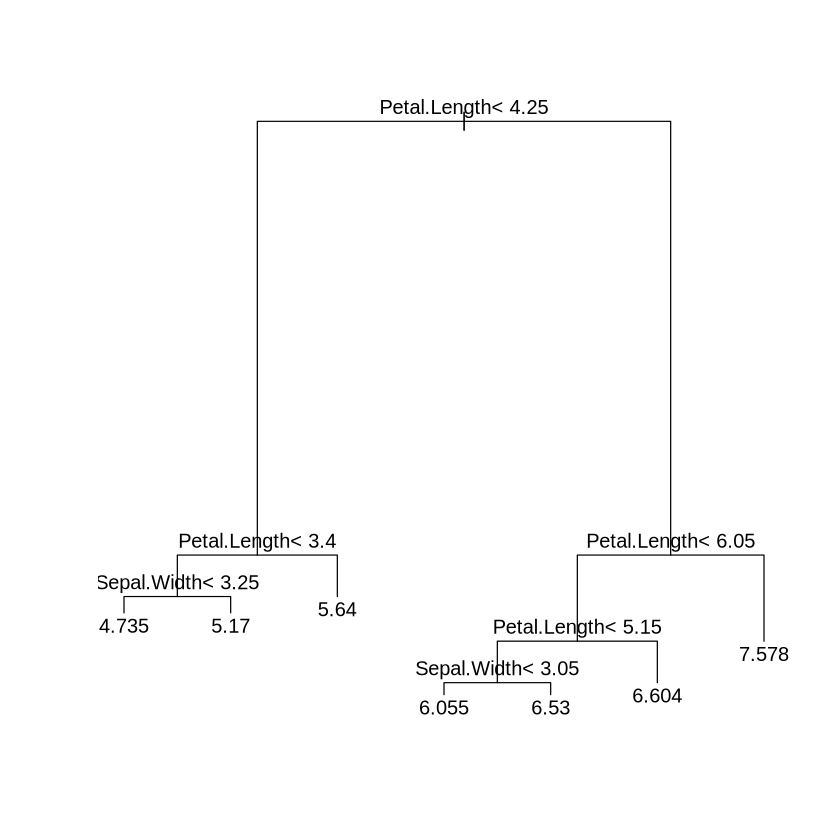

In [14]:
plot(modelo)
text(modelo)


In [15]:
predicao <- predict(modelo, iris)
head(predicao)


1        2        3        4        5        6 
5.169697 4.735000 4.735000 4.735000 5.169697 5.169697

In [17]:
comparacao <- cbind(predicao = predicao, real = iris$Sepal.Length, dif = predicao - iris$Sepal.Length)
head(comparacao)


,predicao,real,dif
1,5.169697,5.1,0.06969697
2,4.735000,4.9,-0.16500000
3,4.735000,4.7,0.03500000
4,4.735000,4.6,0.13500000
5,5.169697,5.0,0.16969697
6,5.169697,5.4,-0.23030303


In [18]:
accuracy(predicao, iris$Sepal.Length)

,ME,RMSE,MAE,MPE,MAPE
Test set,6.335601e-16,0.3062806,0.2425701,-0.2838496,4.219833
